<a href="https://colab.research.google.com/github/deepinmachine/YesBank-stock-prediction-using-Linear-regression/blob/main/Yes_Bank_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yes Bank closing stock price prediction using linear regression

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data files_path
path='/content/drive/MyDrive/data_YesBank_StockPrices.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape#we have 185 rows and 5 columns

(185, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


We no null values and all the data types are correctly mentiioned

We have 4 numerical columns and one date columns although date dataype should be date time but we will not need date for our linear regression model

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [ ]:
df.duplicated().value_counts()

False    185
dtype: int64

There are no duplicate value also

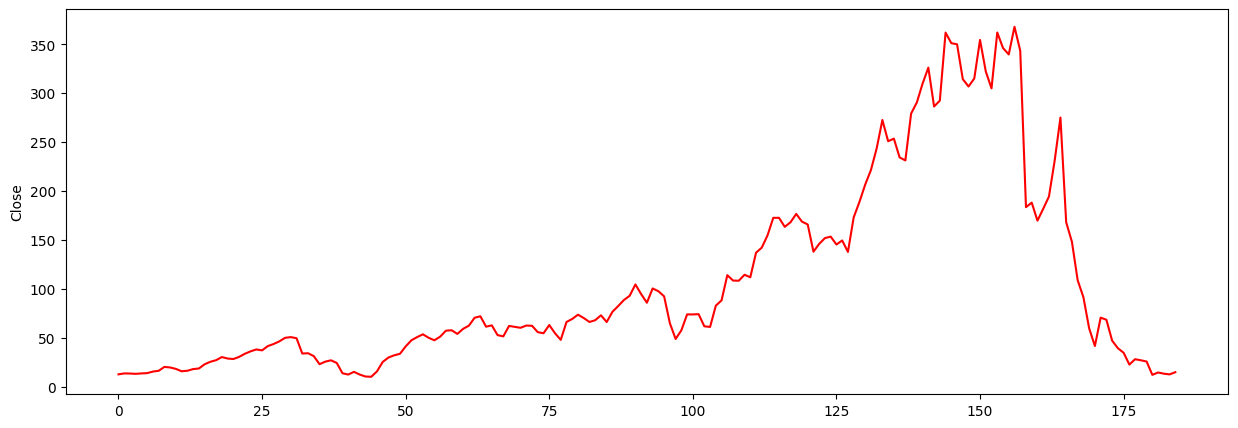

In [ ]:
#univariate analysis
plt.figure(figsize=(15,5))
sns.lineplot(data=df['Close'],color='red')
plt.show()


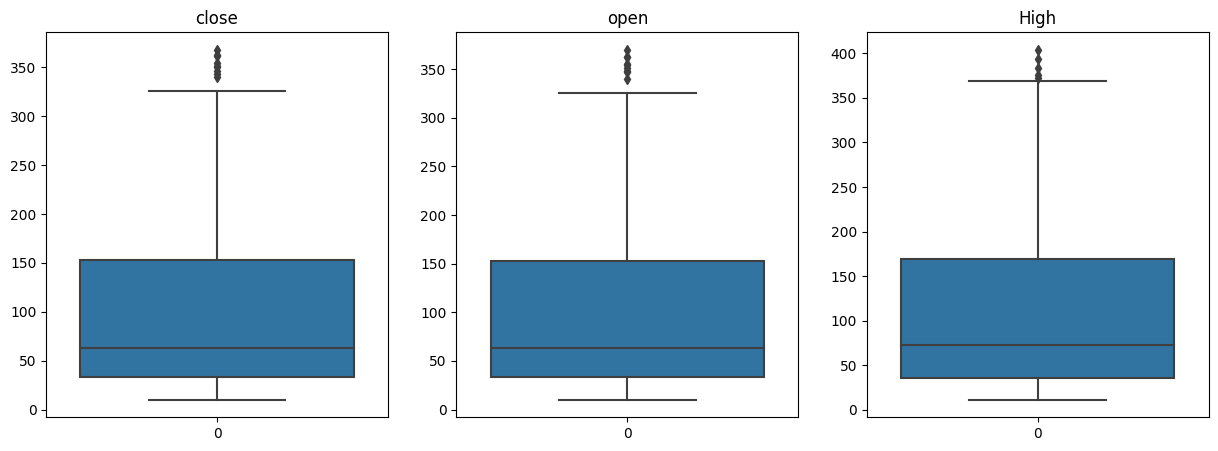

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df['Close'])
plt.title('close')
plt.subplot(1,3,2)
sns.boxplot(df['Open'])
plt.title('open')
plt.subplot(1,3,3)
sns.boxplot(df['High'])
plt.title('High')
plt.show()

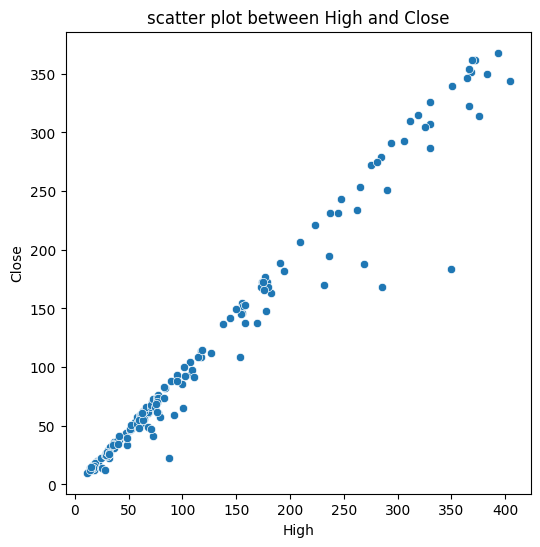

In [ ]:
#bivariate analysis
plt.figure(figsize=(6,6))
sns.scatterplot(x=df['High'],y=df['Close'])
plt.title('scatter plot between High and Close')
plt.show()

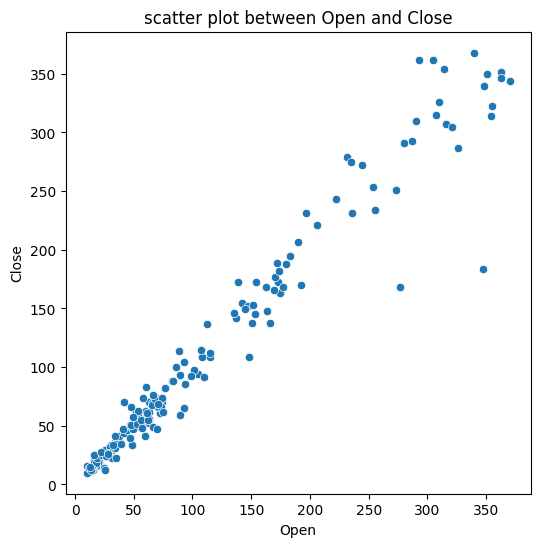

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df['Open'],y=df['Close'])
plt.title('scatter plot between Open and Close')
plt.show()

In [ ]:
df[(df['Close'] > 150) & (df['Close'] < 200) & (df['Open'] < 360) & (df['Open'] > 250)]['Close'].value_counts()

183.45    1
168.00    1
Name: Close, dtype: int64

these are the two outlier that are appearing in this linear relationship

In [ ]:
df = df[~((df['Close'] > 150) & (df['Close'] < 200) & (df['Open'] < 360) & (df['Open'] > 250))]

<ipython-input-21-ef74be23ee81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='PiYG')


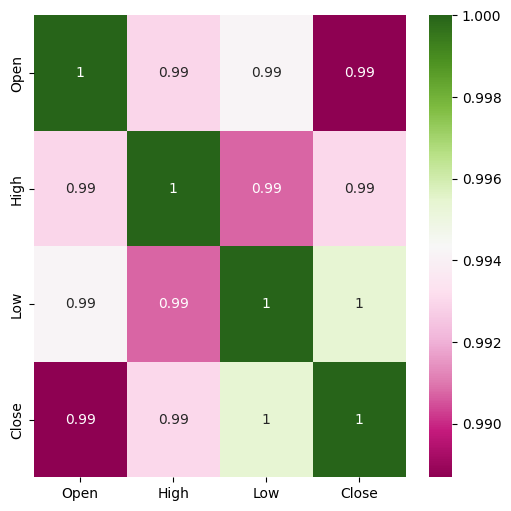

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, cmap='PiYG')
plt.show()

Since all the columns have very high correlation with each other we can use any one column to predict the closing price.

In [ ]:
x=df[['Open','High']]#independent variable
y=df['Close']#Target

In [ ]:
#data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
#importing metrics to calculate the performance of model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [ ]:
print( 'mean square error:',mse(y_test,y_pred))
print('r2_score:', r2(y_test,y_pred))

mean square error: 170.08612588877668
r2_score: 0.9856096634191237
